# Explore Weather Trends

## Data Collection using SQL Queries

*To get the nearest city near me, I checked for all the cities for my country using this command*
> `SELECT * from city_list WHERE country = 'India'`

Then I collected the data for City Delhi using the following command
> `SELECT * from city_data WHERE city = 'Delhi'`

and saved it as a csv with name `City_Data.csv`

And for the global data I ran the following command
> `SELECT * from global_data` 

and saved it as csv with name `Global_Data.csv`

## Reading Data into Pandas DataFrame

In [1]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for ploting the Charts

In [2]:
city_data= pd.read_csv("City_Data.csv")
global_data= pd.read_csv('Global_Data.csv')

In [3]:
city_data.head()

,year,city,country,avg_temp
0,1796,Delhi,India,25.03
1,1797,Delhi,India,26.71
2,1798,Delhi,India,24.29
3,1799,Delhi,India,25.28
4,1800,Delhi,India,25.21


In [4]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


### Joining the two tables on `year` column

In [5]:
final_df= global_data.merge(city_data, how='left', on= "year", suffixes=('_global', '_city')).drop(['city', 'country'], axis= 1)

In [6]:
final_df.set_index('year', inplace= True)

## Exploring Trends

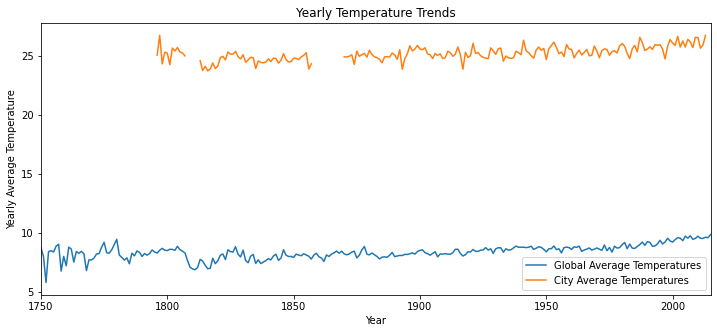

In [7]:
title='Yearly Temperature Trends'
ylabel='Yearly Average Temperature'
xlabel='Year'
fig, ax = plt.subplots()
final_df.plot(figsize=(12,5), ax=ax , title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.savefig('original.png')

## Moving Averages

### Six Years Moving Average

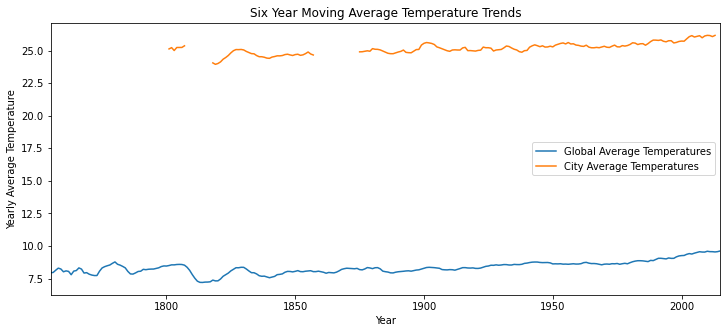

In [8]:
title='Six Year Moving Average Temperature Trends'
ylabel='Yearly Average Temperature'
xlabel='Year'
fig, ax = plt.subplots()
final_df.rolling(window=6).mean().plot(figsize=(12,5), ax=ax , title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.savefig('6yearsMA.png')

### 12 Years Moving Average

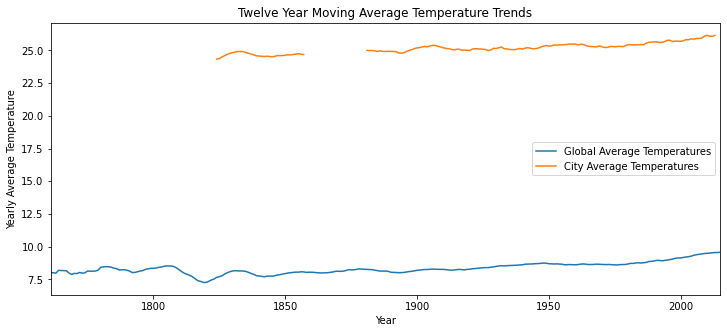

In [9]:
title='Twelve Year Moving Average Temperature Trends'
ylabel='Yearly Average Temperature'
xlabel='Year'
fig, ax = plt.subplots()
final_df.rolling(window=12).mean().plot(figsize=(12,5), ax=ax, title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.savefig('12yearsMA.png')